# BTC-USD @5min

In [2]:
# PARAMS:
BC5M_FILENAME = './data_clean/btc.300s.cbpro.csv'
# TL;DR change params & Kernel > Restart & Run All to "run this like a script"

In [3]:
# autoreload
%load_ext autoreload
%autoreload 1
# write code that works in both Python 2 (2.7+) and 3 (3.5+)
from __future__ import absolute_import, division, print_function, unicode_literals
try:
    input = raw_input
    range = xrange
except NameError:
    pass

In [4]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import pprint
pp = pprint.PrettyPrinter(indent=2).pprint
from IPython.display import display as dd
from IPython.display import Image

%matplotlib inline

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
%aimport lib.helpers
%aimport lib.etl
%aimport lib.visualization
%aimport lib.walk_forward_predict
%aimport models.rnn
%aimport models.lr
from lib.helpers import (
    timing, print_shapes, fix_all_rngs,
    date_str_to_ts
)
from lib.visualization import simple_plot
from lib.walk_forward_predict import (
    run_walk_forward_validation_rnn,
    run_walk_forward_validation_arima
)
import lib.etl as etl
from models.rnn import make_rnn_model_constructor
from models.lr import LRModel

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


> size: 387948


datetime    datetime64[ns]
low                float64
high               float64
open               float64
close              float64
volume             float64
dtype: object

,datetime,low,high,open,close,volume
timestamp,,,,,,
1422745200,2015-01-31 23:00:00,224.51,225.69,225.38,224.51,29.638700
1422745500,2015-01-31 23:05:00,224.00,225.59,224.62,224.00,52.189176
1422745800,2015-01-31 23:10:00,221.99,223.92,223.91,221.99,40.262566
1422746100,2015-01-31 23:15:00,218.00,222.00,222.00,218.00,163.490760
1422746400,2015-01-31 23:20:00,217.11,218.89,217.92,218.22,96.317898


,datetime,low,high,open,close,volume
timestamp,,,,,,
1539128100,2018-10-09 23:35:00,6590.30,6593.48,6591.54,6590.30,17.148190
1539128400,2018-10-09 23:40:00,6586.55,6590.31,6590.31,6589.30,15.269094
1539128700,2018-10-09 23:45:00,6589.29,6589.69,6589.30,6589.48,12.466310
1539129000,2018-10-09 23:50:00,6589.47,6592.81,6589.48,6591.85,14.972801
1539129300,2018-10-09 23:55:00,6589.47,6592.81,6591.84,6589.48,31.305392


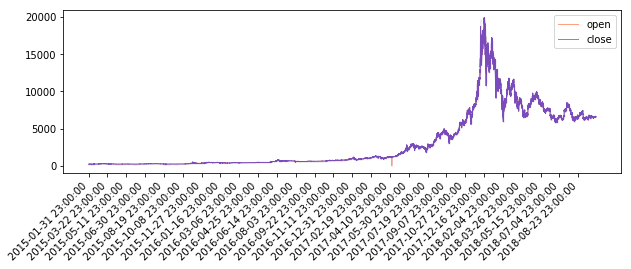

In [6]:
data5m = pd.read_csv(
    BC5M_FILENAME,
    index_col='timestamp',
    parse_dates=['datetime']
)
print('> size:', len(data5m))
dd(data5m.dtypes)
dd(data5m.head())
dd(data5m.tail())
simple_plot(data5m, xticks_span=30 * 24 * 60 // 3)

## Test runs (laptop)

### LR

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.580s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.023s to plot incremental predictions



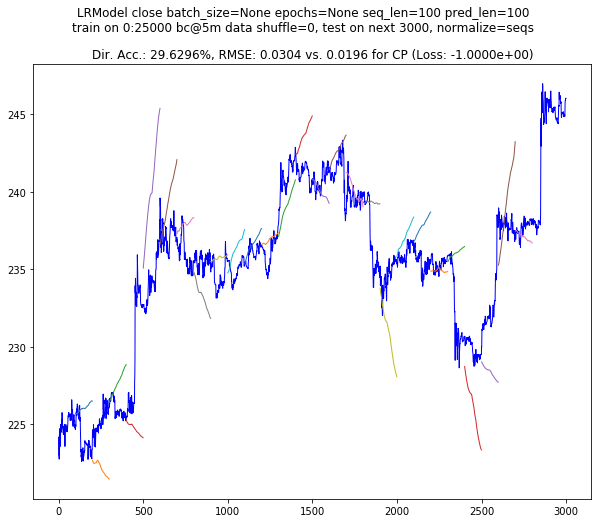

--- 0.928s to run experiment



In [20]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.547s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.022s to plot incremental predictions



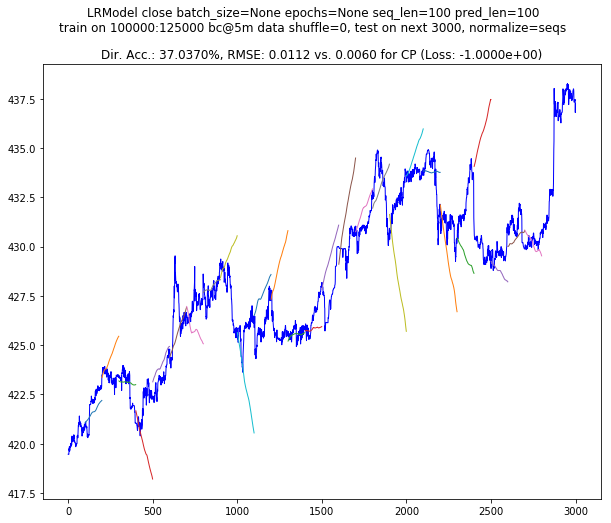

--- 0.890s to run experiment



In [25]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=100000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.589s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.023s to plot incremental predictions



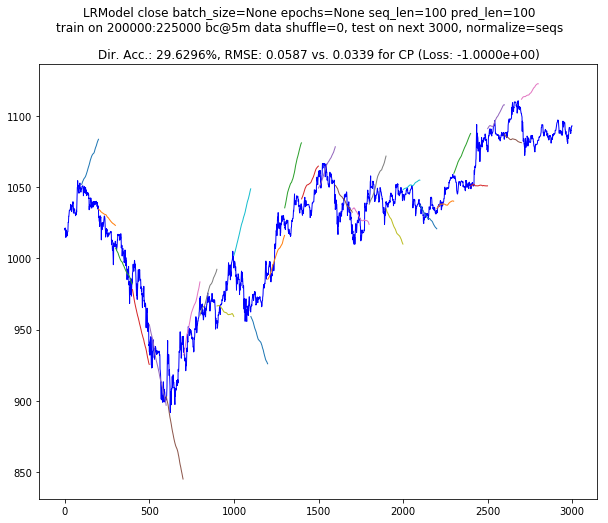

--- 0.963s to run experiment



In [17]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.560s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.024s to plot incremental predictions



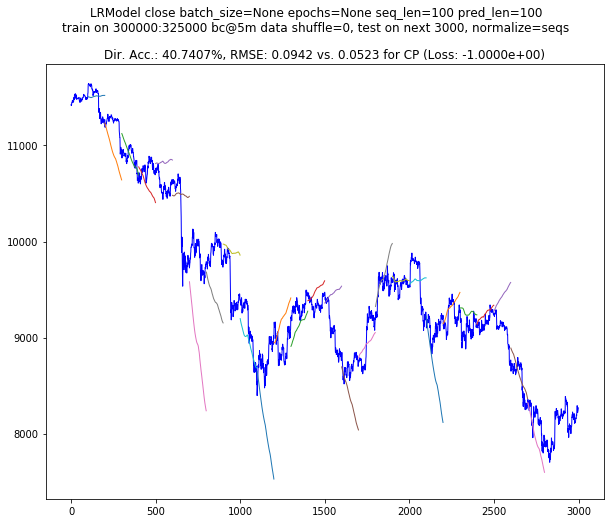

--- 0.894s to run experiment



In [21]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=300000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

**LR Model conclusion:** Significantly worse than random guessing at direction prediction. Significantly higher RMSE than constant prediction. This model is obviously not adequate for this type of data.

### ARIMA

In [18]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA

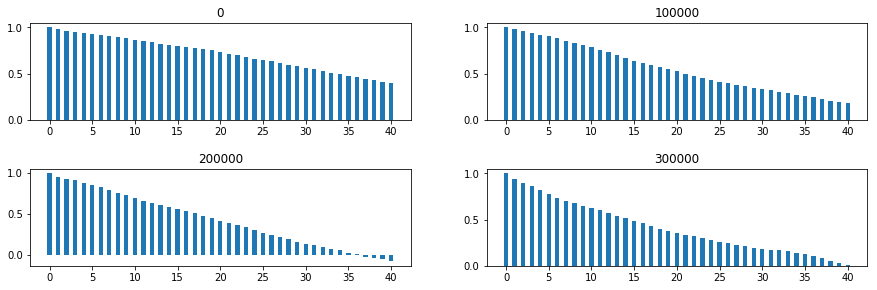

In [34]:
plt.figure(figsize=(15, 5), facecolor='white')
plt.subplots_adjust(top=0.8, hspace=0.5)
for i, n in enumerate([0, 100000, 200000, 300000]):
    plt.subplot(2, 2, i + 1)
    plt.title(str(n))
    data_acf = acf(data5m[n: n + 300]['close'].values)
    plt.bar(np.arange(len(data_acf)), data_acf, width=0.5)

**Conclusion:** looks like an AR process (cannot exclude an MA component though).

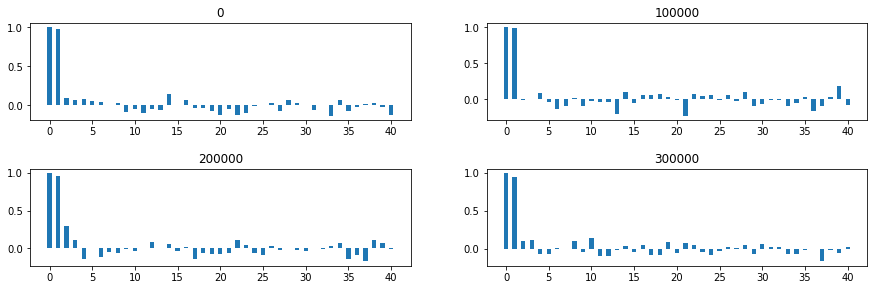

In [35]:
plt.figure(figsize=(15, 5), facecolor='white')
plt.subplots_adjust(top=0.8, hspace=0.5)
for i, n in enumerate([0, 100000, 200000, 300000]):
    plt.subplot(2, 2, i + 1)
    plt.title(str(n))
    data_pacf = pacf(data5m[n: n + 300]['close'].values)
    plt.bar(np.arange(len(data_pacf)), data_pacf, width=0.5)

**Conclusion:** AR(2), maybe AR(3).

Worth trying:
- (2, 0, 0) !
- (2, 1, 0)
- (2, 0, 1) !
- (2, 0, 2)
- (3, 0, 0)
- (3, 0, 1)

/home/neuronq/miniconda3/envs/fucap/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


--- 418.688s to run experiment



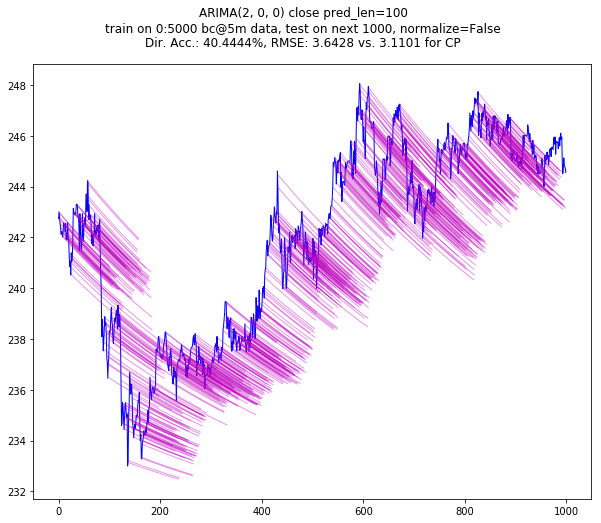

In [41]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 0),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/neuronq/miniconda3/envs/fucap/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


--- 1421.849s to run experiment



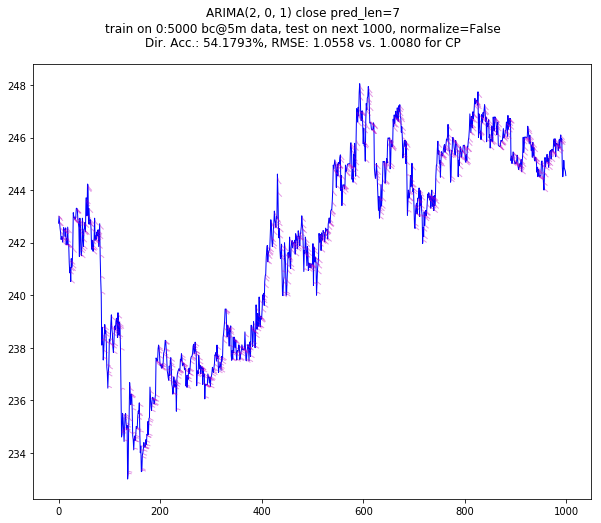

In [42]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 1),
        pred_len=7,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

### LSTM

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.014s to model compilation time


--- Created model id: 139893066300944
Tensor("lstm_5_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

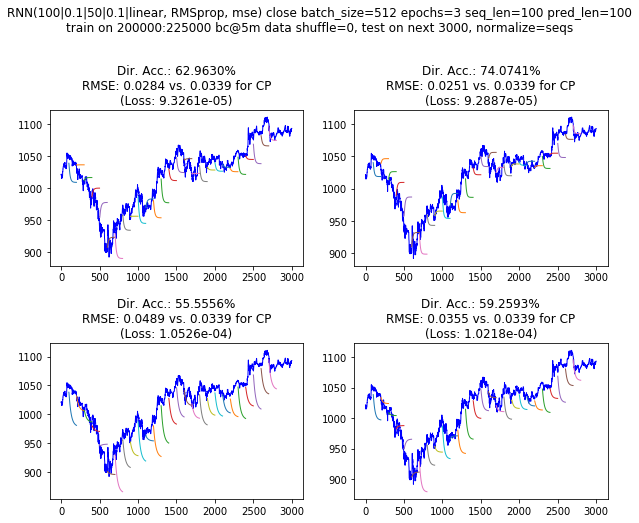

--- 589.297s to run experiment



In [15]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

## Test runs (server)

### LSTM

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.014s to model compilation time


--- Created model id: 139965580952144
Tensor("lstm_1_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

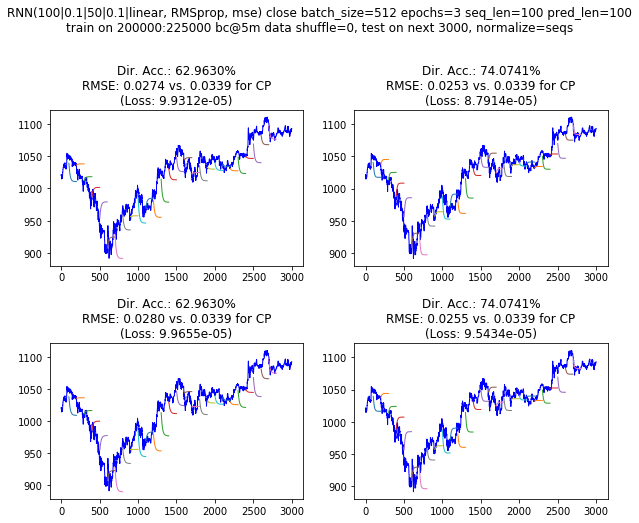

--- 184.504s to run experiment



In [7]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )